<a href="https://colab.research.google.com/github/BrunoASNascimento/teste_kroton_covid_ds/blob/main/kroton_covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio:

- Em Novembro 2020, o comitê de risco da Kroton solicitou a equipe de Arquitetura de processos do aluno, analisar possíveis impactos do cenário COVID nos alunos calouros da modalidade presencial distribuídos por todo o Brasil.
- A ideia principal é entender se existe algum comportamento comum destes alunos, e tentar estruturar planos para melhorar a experiência deste aluno dentro do contexto da Pandemia.
- Além disso, o comitê de risco da Kroton também quer saber se a estratégia que foi traçada com o time do comercial de ter uma evasão máxima de 5% dos alunos calouros e uma taxa de transferência para a modalidade EAD máxima de 1% foi atendida até o momento. Em caso negativo, quais seriam as possíveis estratégias para os alunos que ainda não efetivaram sua matrícula de alcançar esta meta?
- O comitê tem disponível R$ 2MM de verba para investir em ações para mitigar os impactos do COVID na instituição. Como você recomendaria a aplicação deste montante?
- Sendo assim, você deverá preparar uma apresentação em Power Point para apresentar, em no máximo 30 min, para este comitê trazendo as respostas e insights descritos nos pontos acima.





# Imports


In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt

# Leitura dos dados

Os dados "Aux_Curso.xlsx", "Aux_chamado.xlsx", "Base_Chamados.xlsx" e "Base_log_calouros.xlsx", são os dados providos pela Kroton, para análise, achei necessário fazer a extração de mais uma base para compor a análise, "covid_hist_brasil.csv” (Fonte: https://covid.saude.gov.br/).

In [ ]:
df_aux_curso = pd.read_excel('data/Aux_Curso.xlsx',index_col=0)
df_aux_chamado = pd.read_excel('data/Aux_chamado.xlsx',index_col=0)
df_base_chamado = pd.read_excel('data/Base_Chamados.xlsx',index_col=0)
df_base_calouros = pd.read_excel('data/Base_log_calouros.xlsx',index_col=0)
df_covid = pd.read_csv('data/covid_hist_brasil.csv',sep=';')

print(f'df_aux_curso: {df_aux_curso.shape}')
print(f'df_aux_chamado: {df_aux_chamado.shape}')
print(f'df_base_chamado: {df_base_chamado.shape}')
print(f'df_base_calouros: {df_base_calouros.shape}')
print(f'df_covid: {df_base_calouros.shape}')

df_aux_curso: (3652, 3)
df_aux_chamado: (83, 3)
df_base_chamado: (938182, 5)
df_base_calouros: (246110, 5)
df_covid: (246110, 5)


# Visualização dos dados


In [ ]:
df_aux_curso.head()

,CODIGO_CURSO,Ticket médio mensal,Grande área do curso
0,3,241,Humanas
1,6,143,Humanas
2,243,226,Humanas
3,246,347,Humanas
4,258,107,Humanas


In [ ]:
df_aux_chamado.head()

,SHORT_DESCRIPTION,FRENTE,ÁREA DE SUPORTE RESPONSÁVEL
0,KrotonPDA > Serviços Acadêmicos > Atestado de ...,PORTAL,Secretaria Acadêmica
1,KrotonPDA > Serviços Acadêmicos > Histórico Es...,PORTAL,Secretaria Acadêmica
2,KrotonPDA > Serviços Acadêmicos > Inclusão de ...,PORTAL,Secretaria Acadêmica
3,KrotonPDA > Serviços Acadêmicos > Suspensão de...,PORTAL,Secretaria Acadêmica
4,KrotonPDA > Serviços Financeiros > Alterar o ...,PORTAL,Financeiro


In [ ]:
df_base_chamado.head()

,NUMBER_SN,SYS_CREATED_ON,SHORT_DESCRIPTION,RA_ALUNO,FRENTE
1,CS2245705,2020-03-14 14:08:30,PAD > 1. Graduação Presencial > Atendimento de...,3489323595,PRES
4,CS1496976,2020-01-30 16:14:06,PDA > Serviços Acadêmicos > Entregar Atividade...,818823833,PORTAL
5,CS1541894,2020-02-04 15:01:09,PDA > Serviços Acadêmicos > Atestado de Matrícula,379127814579,PORTAL
9,CS1550304,2020-02-04 20:57:00,PDA > Serviços Financeiros > Não Consigo Gerar...,365392513920,PORTAL
12,CS1913239,2020-03-03 12:23:24,PDA > Serviços Acadêmicos > Alterar Meu Curso ...,373087769067,PORTAL


In [ ]:
df_base_calouros.head()

,CODIGO_ALUNO,CODIGO_CURSO,DATA_LOG,SITUACAO_ALUNO,TIPO_ALUNO
13,11185893,543,2020-06-25,E,Calouro
14,11185893,543,2020-01-04,C,Calouro
15,11185893,543,2020-01-03,P,Calouro
19,3941358,2802,2020-02-20,C,Calouro
20,3941358,2802,2020-01-22,P,Calouro


In [ ]:
df_base_chamado.head()

,NUMBER_SN,SYS_CREATED_ON,SHORT_DESCRIPTION,RA_ALUNO,FRENTE
1,CS2245705,2020-03-14 14:08:30,PAD > 1. Graduação Presencial > Atendimento de...,3489323595,PRES
4,CS1496976,2020-01-30 16:14:06,PDA > Serviços Acadêmicos > Entregar Atividade...,818823833,PORTAL
5,CS1541894,2020-02-04 15:01:09,PDA > Serviços Acadêmicos > Atestado de Matrícula,379127814579,PORTAL
9,CS1550304,2020-02-04 20:57:00,PDA > Serviços Financeiros > Não Consigo Gerar...,365392513920,PORTAL
12,CS1913239,2020-03-03 12:23:24,PDA > Serviços Acadêmicos > Alterar Meu Curso ...,373087769067,PORTAL


In [ ]:
df_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


# Verificação das datas

In [ ]:
print(f'Date min in df_base_calouros {df_base_calouros["DATA_LOG"].min()} and max {df_base_calouros["DATA_LOG"].max()}')
print(f'Date min in df_base_chamado {df_base_chamado["SYS_CREATED_ON"].min()} and max {df_base_chamado["SYS_CREATED_ON"].max()}')

Date min in df_base_calouros 2019-09-26 00:00:00 and max 2020-08-17 00:00:00
Date min in df_base_chamado 2020-01-01 03:20:41 and max 2020-07-02 02:59:13


# Corte de dados por data

Dado que de acordo com o Ministério da Saúde, a pandemia do Covid-19 teve início aqui no Brasil no dia 26/02/2020, somente utilizarei os dados após essa 
data, para verificar o impacto do Covid-19 na operação.

Fonte: https://coronavirus.saude.gov.br/linha-do-tempo/

In [ ]:
df_base_calouros = df_base_calouros[df_base_calouros['DATA_LOG'] >= '2020-02-26']
df_base_chamado = df_base_chamado[df_base_chamado['SYS_CREATED_ON'] >= '2020-02-26']

print(f'df_base_chamado: {df_base_chamado.shape}')
print(f'df_base_calouros: {df_base_calouros.shape}')

df_base_chamado: (651699, 5)
df_base_calouros: (46859, 5)


# Verificação do tipo de aluno

Como a análise deve abordar os calouros somente, é necessário verificar para que não haja inconsistências.


In [ ]:
df_base_calouros['TIPO_ALUNO'].drop_duplicates()

13    Calouro
Name: TIPO_ALUNO, dtype: object

# Visualizando a situação do aluno

Nesse trecho há a separação dos dados dos alunos cursando e matriculado, somente cursando, evadidos e transferidos, é printado esses valos para ter uma visão mais macro do número de aluno em cada situação.


In [ ]:
# Filtro cursando e matriculado
df_base_calouros_cursando_matriculado = df_base_calouros[df_base_calouros['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])] 
# Filtro cursando
df_base_calouros_cursando = df_base_calouros[df_base_calouros['SITUACAO_ALUNO'].isin(["C","F","R","S"])]
# Filtro evadidos
df_base_calouros_evadidos = df_base_calouros[df_base_calouros['SITUACAO_ALUNO']=="E"]
# Filtro transferido 
df_base_calouros_transferidos = df_base_calouros[df_base_calouros['SITUACAO_ALUNO']=="T"]

# Nunique faz a contagem dos valores unicos
calouros_cursando_matriculado = df_base_calouros_cursando_matriculado["CODIGO_ALUNO"].nunique()
calouros_cursando = df_base_calouros_cursando["CODIGO_ALUNO"].nunique()
calouros_evadidos = df_base_calouros_evadidos["CODIGO_ALUNO"].nunique()
calouros_transferidos = df_base_calouros_transferidos["CODIGO_ALUNO"].nunique()

# Outputs
print(f'calouros_cursando_matriculado: {calouros_cursando_matriculado}')
print(f'calouros_cursando: {calouros_cursando}')
print(f'calouros_evadidos: {calouros_evadidos}')
print(f'calouros_transferidos: {calouros_transferidos}')

calouros_cursando_matriculado: 7705
calouros_cursando: 7705
calouros_evadidos: 28421
calouros_transferidos: 2769


# Verificação de evasão dos calouros

Efetuei a filtragem dos alunos que estavam cursando e mudaram sua situação para evadido, utilizei tanto os alunos que tinha a situação matriculado e cursando, quanto os somente cursando, os resultados foram superiores aos 5% traçado.


In [ ]:
# Filtragem dos aluno cursando matriculado
df_base_calouros_diff_cursando_matriculado_evadidos = df_base_calouros_cursando_matriculado[df_base_calouros_cursando_matriculado['CODIGO_ALUNO'].isin(df_base_calouros_evadidos['CODIGO_ALUNO'])]
# Contagem única
diff_cursando_matriculado_evadidos = df_base_calouros_diff_cursando_matriculado_evadidos["CODIGO_ALUNO"].nunique()

# Percentual
percent_calouros_cursando_matriculado_evadidos = diff_cursando_matriculado_evadidos/calouros_cursando_matriculado
print(f'percent_calouros_cursando_matriculado_evadidos: {round(100*percent_calouros_cursando_matriculado_evadidos,2)}%')

percent_calouros_cursando_matriculado_evadidos: 36.24%


In [ ]:
# Filtragem dos aluno cursando 
df_base_calouros_diff_cursando_evadidos = df_base_calouros_cursando[df_base_calouros_cursando['CODIGO_ALUNO'].isin(df_base_calouros_evadidos['CODIGO_ALUNO'])]
# Contagem única
diff_cursando_evadidos = df_base_calouros_diff_cursando_evadidos["CODIGO_ALUNO"].nunique()

# Percentual
percent_calouros_cursando_evadidos = diff_cursando_evadidos/calouros_cursando
print(f'percent_calouros_cursando_evadidos: {round(100*percent_calouros_cursando_evadidos,2)}%')

percent_calouros_cursando_evadidos: 36.24%


# Verificação de transferência dos calouros

Efetuei, como no caso anterior, a filtragem dos alunos que estavam cursando e mudaram sua situação para evadido, utilizei tanto os alunos que tinha a situação matriculado e cursando, quanto os somente cursando, os resultados foram superiores ao 1% traçado.


In [ ]:
# Filtragem dos aluno cursando matriculado
df_base_calouros_diff_cursando_matriculado_transferidos = df_base_calouros_cursando_matriculado[df_base_calouros_cursando_matriculado['CODIGO_ALUNO'].isin(df_base_calouros_transferidos['CODIGO_ALUNO'])]
# Contagem única
diff_cursando_matriculado_transferidos = df_base_calouros_diff_cursando_matriculado_transferidos["CODIGO_ALUNO"].nunique()

# Percentual
percent_calouros_cursando_matriculado_transferidos = diff_cursando_matriculado_transferidos/calouros_cursando_matriculado
print(f'percent_calouros_cursando_matriculado_transferidos: {round(100*percent_calouros_cursando_matriculado_transferidos,2)}%')

percent_calouros_cursando_matriculado_transferidos: 5.22%


In [ ]:
# Filtragem dos aluno cursando 
df_base_calouros_diff_cursando_transferidos = df_base_calouros_cursando[df_base_calouros_cursando['CODIGO_ALUNO'].isin(df_base_calouros_transferidos['CODIGO_ALUNO'])]
# Contagem única
diff_cursando_transferidos = df_base_calouros_diff_cursando_transferidos["CODIGO_ALUNO"].nunique()

# Percentual
percent_calouros_cursando_transferidos = diff_cursando_transferidos/calouros_cursando
print(f'percent_calouros_cursando_transferidos: {round(100*percent_calouros_cursando_transferidos,2)}%')

percent_calouros_cursando_transferidos: 5.22%


# Junção da base de calouoros com a tabela auxiliar

Essa junção é feita para levantar-se duas hipóteses:

- Calouros dos cursos de humanas tiveram  uma evasão maior, dado que esses cargos na indústria costumam ter um salário inferior no geral?
- Quanto maior o ticket médio, maior a evasão?

Respostas:

É possível notar que não, os calouros evadidos seguem de forma muito semelhante o comportamento dos calouros cursando, então não há a relação entre  maior evasão pelo valor do ticket.

In [ ]:
df_base_calouros_with_curso = pd.merge(df_base_calouros,df_aux_curso,how='left',on='CODIGO_CURSO')
df_base_calouros_with_curso.head()

,CODIGO_ALUNO,CODIGO_CURSO,DATA_LOG,SITUACAO_ALUNO,TIPO_ALUNO,Ticket médio mensal,Grande área do curso
0,11185893,543,2020-06-25,E,Calouro,267,Humanas
1,10834008,2790,2020-06-20,F,Calouro,182,Humanas
2,11388114,1245,2020-06-25,E,Calouro,302,Humanas
3,11389155,5442,2020-02-27,E,Calouro,497,Humanas
4,11401209,606,2020-02-27,E,Calouro,1708,Humanas


## Ticket médio geral

array([[<AxesSubplot:title={'center':'Ticket médio mensal'}>]],
      dtype=object)

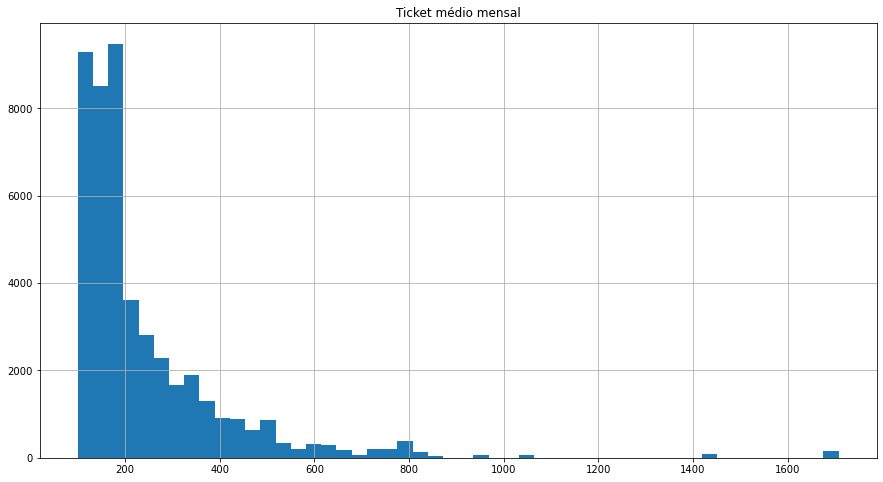

In [ ]:
df_base_calouros_with_curso.hist(column='Ticket médio mensal',bins=50,figsize=(15,8))

## Ticket médio para evasão

array([[<AxesSubplot:title={'center':'Ticket médio mensal'}>]],
      dtype=object)

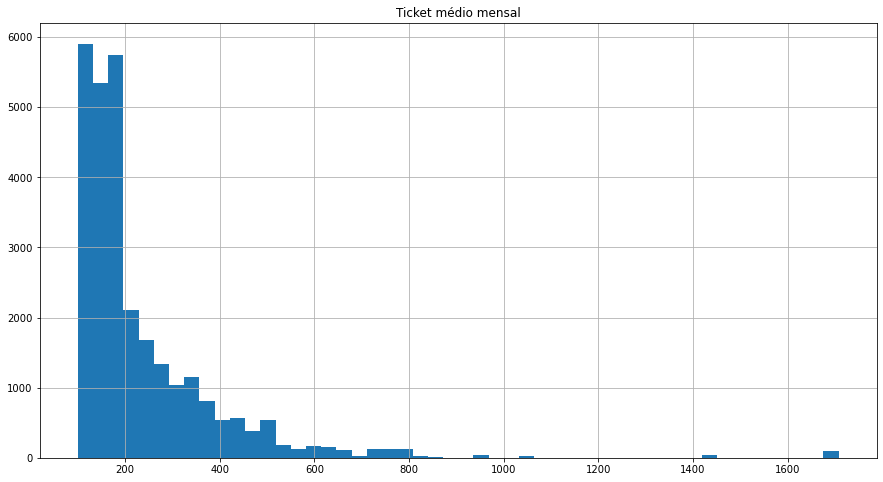

In [ ]:
df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["E"])].hist(column='Ticket médio mensal',bins=50,figsize=(15,8))

## Ticket médio para cursando e/ou matriculado

array([[<AxesSubplot:title={'center':'Ticket médio mensal'}>]],
      dtype=object)

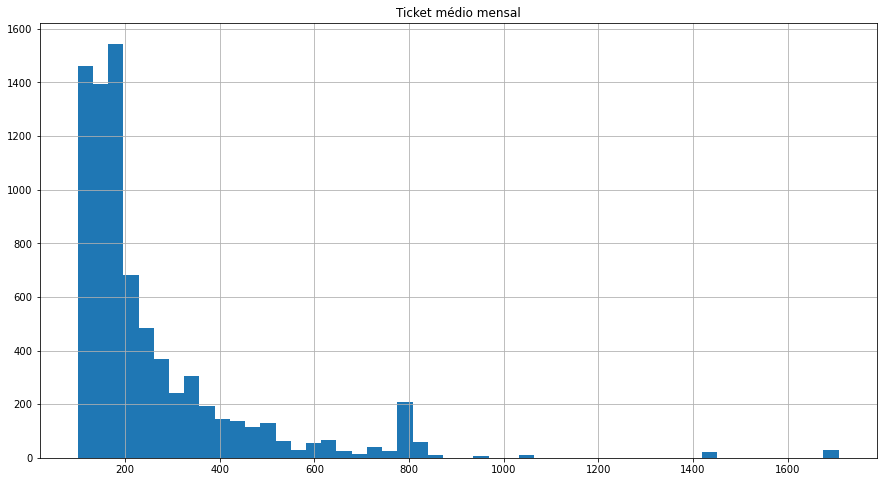

In [ ]:
df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])].hist(column='Ticket médio mensal',bins=50,figsize=(15,8))

## Total de alunos por área

In [ ]:
df_base_calouros_with_curso.groupby(['Grande área do curso'],as_index=False)['CODIGO_ALUNO'].nunique()

,Grande área do curso,CODIGO_ALUNO
0,Biológicas,7460
1,Exatas,14239
2,Humanas,14798


## Total de alunos cursando e/ou matriculados por área

In [ ]:
# Filtro cursando
df_base_calouros_with_curso_cursando = df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])]
# Contagem de alunos
df_base_calouros_with_curso_cursando_total = df_base_calouros_with_curso_cursando.groupby(['Grande área do curso'],as_index=False)['CODIGO_ALUNO'].nunique().rename(columns={'CODIGO_ALUNO':'CALOUROS_CURSANDO'})
df_base_calouros_with_curso_cursando_total

,Grande área do curso,CALOUROS_CURSANDO
0,Biológicas,1538
1,Exatas,2997
2,Humanas,3174


## Total de alunos evadidos por área


In [ ]:
# Filtro evadidos
df_base_calouros_with_curso_evadidos = df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO']=="E"]

# Fitro dos alunos cursando
calouros_cursando = df_base_calouros_with_curso_cursando['CODIGO_ALUNO'].drop_duplicates()
df_base_calouros_with_curso_evadidos_cursando = df_base_calouros_with_curso_evadidos[df_base_calouros_with_curso_evadidos['CODIGO_ALUNO'].isin(calouros_cursando)]

# Contagem dos alunos evadidos
df_base_calouros_with_curso_evadidos_cursando_total = df_base_calouros_with_curso_evadidos_cursando.groupby(['Grande área do curso'],as_index=False)['CODIGO_ALUNO'].nunique().rename(columns={'CODIGO_ALUNO':'CALOUROS_EVADIDOS'})
df_base_calouros_with_curso_evadidos_cursando_total

,Grande área do curso,CALOUROS_EVADIDOS
0,Biológicas,614
1,Exatas,1117
2,Humanas,1074


## Total de alunos transferidos por área


In [ ]:
# Filtro transferidos
df_base_calouros_with_curso_transferidos = df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["T"])]

# Fitro dos alunos cursando
df_base_calouros_with_curso_transferidos_cursando = df_base_calouros_with_curso_transferidos[df_base_calouros_with_curso_transferidos['CODIGO_ALUNO'].isin(calouros_cursando)]

# Contagem dos alunos transferidos
df_base_calouros_with_curso_transferidos_cursando_total = df_base_calouros_with_curso_transferidos_cursando.groupby(['Grande área do curso'],as_index=False)['CODIGO_ALUNO'].nunique().rename(columns={'CODIGO_ALUNO':'CALOUROS_TRANSFERIDOS'})
df_base_calouros_with_curso_transferidos_cursando_total

,Grande área do curso,CALOUROS_TRANSFERIDOS
0,Biológicas,68
1,Exatas,139
2,Humanas,195


## Proporção

Respondendo a questão levantada no inicio desse tópico, que alunos das áreas humanas tiveram uma evasão maior que o de outras áreas, a hipótese se mostrou falha, sento a evasão maior nas áreas exatas, cerca de 5% acima das áreas humanas. Mas também foi o curso que teve proporcionalmente uma maior transferência.

In [ ]:
# Junção dos dados
df_curso_resume = pd.merge(
    df_base_calouros_with_curso_cursando_total,
    df_base_calouros_with_curso_evadidos_cursando_total,
    how='left',
    on='Grande área do curso'
).merge(    
    df_base_calouros_with_curso_transferidos_cursando_total,
    how='left',
    on='Grande área do curso'
    )

#  Proporção
df_curso_resume['percent_evadidos'] = df_curso_resume['CALOUROS_EVADIDOS']/df_curso_resume['CALOUROS_CURSANDO']
df_curso_resume['percent_transferidos'] = df_curso_resume['CALOUROS_TRANSFERIDOS']/df_curso_resume['CALOUROS_CURSANDO']
df_curso_resume

,Grande área do curso,CALOUROS_CURSANDO,CALOUROS_EVADIDOS,CALOUROS_TRANSFERIDOS,percent_evadidos,percent_transferidos
0,Biológicas,1538,614,68,0.399220,0.044213
1,Exatas,2997,1117,139,0.372706,0.046380
2,Humanas,3174,1074,195,0.338374,0.061437


In [ ]:
df_curso_resume.corr()

,CALOUROS_CURSANDO,CALOUROS_EVADIDOS,CALOUROS_TRANSFERIDOS,percent_evadidos,percent_transferidos
CALOUROS_CURSANDO,1.000000,0.984566,0.937026,-0.878102,0.672851
CALOUROS_EVADIDOS,0.984566,1.000000,0.861439,-0.780811,0.532996
CALOUROS_TRANSFERIDOS,0.937026,0.861439,1.000000,-0.989916,0.888853
percent_evadidos,-0.878102,-0.780811,-0.989916,1.000000,-0.944796
percent_transferidos,0.672851,0.532996,0.888853,-0.944796,1.000000


# Análise exploratória dos chamados

In [ ]:
# Apenas para verificar o tipo dos dados
# df_base_chamado.info() 
# df_base_calouros_with_curso.info()

# Mudando tipo de dado integer para string, pois entrada do numero do aluno foi lida de maneira diferente  
df_base_calouros_with_curso['CODIGO_ALUNO_STR'] = df_base_calouros_with_curso['CODIGO_ALUNO'].astype(str)

# Junção dos calouros com a base de chamados
df_base_calouros_with_curso_and_chamado = pd.merge(
    df_base_calouros_with_curso,
    df_base_chamado.groupby(['RA_ALUNO'],as_index=False)['SHORT_DESCRIPTION'].count().rename(columns={'SHORT_DESCRIPTION':'SHORT_DESCRIPTION_COUNT'}),
    how='left',
    right_on='RA_ALUNO',
    left_on='CODIGO_ALUNO_STR'
)

# Substituição de vazio para 0, pois se não existe chamado feito pelo aluno, então o numero de chamados é 0
df_base_calouros_with_curso_and_chamado['SHORT_DESCRIPTION_COUNT'].fillna(0,inplace=True)
df_base_calouros_with_curso_and_chamado.head()

,CODIGO_ALUNO,CODIGO_CURSO,DATA_LOG,SITUACAO_ALUNO,TIPO_ALUNO,Ticket médio mensal,Grande área do curso,CODIGO_ALUNO_STR,RA_ALUNO,SHORT_DESCRIPTION_COUNT
0,11185893,543,2020-06-25,E,Calouro,267,Humanas,11185893,NaN,0.0
1,10834008,2790,2020-06-20,F,Calouro,182,Humanas,10834008,NaN,0.0
2,11388114,1245,2020-06-25,E,Calouro,302,Humanas,11388114,NaN,0.0
3,11389155,5442,2020-02-27,E,Calouro,497,Humanas,11389155,NaN,0.0
4,11401209,606,2020-02-27,E,Calouro,1708,Humanas,11401209,NaN,0.0


## Histograma de chamados dos calouros cursando

Valores concentrados no zero.

(0.0, 2.0)

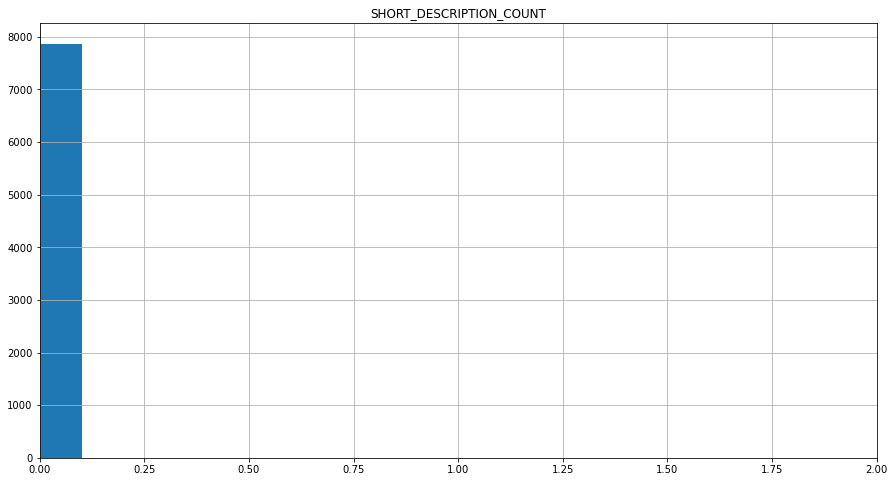

In [ ]:
ax = None
ax = df_base_calouros_with_curso_and_chamado[df_base_calouros_with_curso_and_chamado['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])].hist(column='SHORT_DESCRIPTION_COUNT',bins=20,figsize=(15,8))
ax[0][0].set_xlim((0,df_base_calouros_with_curso_and_chamado['SHORT_DESCRIPTION_COUNT'].max()))

## Histograma de chamados dos calouros evadidos

Valores concentrados no zero

(0.0, 2.0)

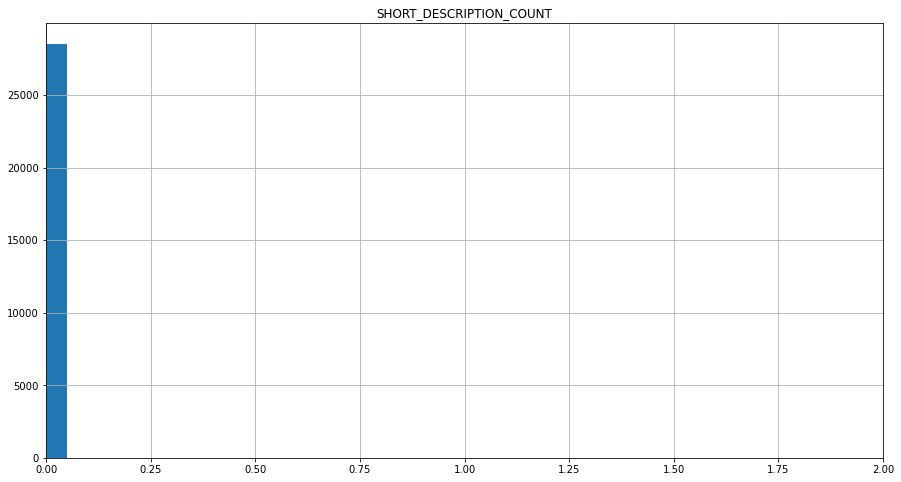

In [ ]:
ax = None
ax = df_base_calouros_with_curso_and_chamado[df_base_calouros_with_curso_and_chamado['SITUACAO_ALUNO']=="E"].hist(column='SHORT_DESCRIPTION_COUNT',bins=20,figsize=(15,8))
ax[0][0].set_xlim((0,df_base_calouros_with_curso_and_chamado['SHORT_DESCRIPTION_COUNT'].max()))

## Verificação dos chamados por aluno geral

In [ ]:
df_base_chamado[df_base_chamado['RA_ALUNO'].isin(df_base_calouros_with_curso['CODIGO_ALUNO'].astype(str))]['RA_ALUNO'].nunique()

1

### Contra prova

Apenas dois alunos da base de calouros abriram um chamado, número inespressivel.

In [ ]:
df_base_calouros_with_curso[df_base_calouros_with_curso['CODIGO_ALUNO'].astype(str).isin(df_base_chamado['RA_ALUNO'].drop_duplicates())]['CODIGO_ALUNO'].nunique()

1

## Análise exploratória do tipo de chamado

In [ ]:
# Extraindo mês e ano da data
df_base_chamado['MES_CREATED'] = df_base_chamado['SYS_CREATED_ON'].dt.to_period('M').astype(str)
df_base_chamado.head()

,NUMBER_SN,SYS_CREATED_ON,SHORT_DESCRIPTION,RA_ALUNO,FRENTE,MES_CREATED
1,CS2245705,2020-03-14 14:08:30,PAD > 1. Graduação Presencial > Atendimento de...,3489323595,PRES,2020-03
12,CS1913239,2020-03-03 12:23:24,PDA > Serviços Acadêmicos > Alterar Meu Curso ...,373087769067,PORTAL,2020-03
14,CS1903862,2020-03-02 22:20:12,PDA > Serviços Acadêmicos > Retirar Confirmaçã...,34516744921,PORTAL,2020-03
17,CS2150423,2020-03-11 17:30:23,PDA > Serviços Acadêmicos > Entregar Atividade...,261534016341,PORTAL,2020-03
18,CS2347795,2020-03-18 18:44:07,PDA > Serviços Acadêmicos > Entregar Atividade...,11690073812,PORTAL,2020-03


In [ ]:
# Contagem do número de alunos
df_base_chamado_total_mensal = df_base_chamado.groupby(['MES_CREATED','SHORT_DESCRIPTION'],as_index=False)['RA_ALUNO'].count().rename(columns={'RA_ALUNO':'RA_ALUNO_COUNT'})
df_base_chamado_total_mensal.head()

,MES_CREATED,SHORT_DESCRIPTION,RA_ALUNO_COUNT
0,2020-02,PAD > 1. Graduação Presencial > Alterar Situaç...,750
1,2020-02,PAD > 1. Graduação Presencial > Ambiente Virtu...,200
2,2020-02,PAD > 1. Graduação Presencial > Atendimento Pr...,402
3,2020-02,PAD > 1. Graduação Presencial > Atendimento de...,2314
4,2020-02,PAD > 1. Graduação Presencial > Bolsa deferida...,209


### Fazendo a extração dos top 5 chamados por mês

In [ ]:
# DataFrame inicial
df_base_chamado_total_mensal_maximos = pd.DataFrame()

for date_filter in df_base_chamado_total_mensal['MES_CREATED'].drop_duplicates().values:
    data = None
    # Filtro por data
    data = df_base_chamado_total_mensal[df_base_chamado_total_mensal['MES_CREATED']==date_filter].sort_values(by='RA_ALUNO_COUNT',ascending=False)[:5]
    df_base_chamado_total_mensal_maximos = df_base_chamado_total_mensal_maximos.append(data)

df_base_chamado_total_mensal_maximos

,MES_CREATED,SHORT_DESCRIPTION,RA_ALUNO_COUNT
29,2020-02,PDA > Serviços Acadêmicos > Carteirinha Provis...,4806
46,2020-02,PDA > Serviços Financeiros > Não Consigo Gerar...,4003
34,2020-02,PDA > Serviços Acadêmicos > Entregar Atividade...,3648
27,2020-02,PDA > Serviços Acadêmicos > Atestado de Matrícula,3261
56,2020-02,PDA > Solicitação de Carteirinha > Solicitação...,3203
105,2020-03,PDA > Serviços Financeiros > Não Consigo Gerar...,45339
93,2020-03,PDA > Serviços Acadêmicos > Entregar Atividade...,31843
113,2020-03,PDA > Serviços Financeiros > Termo de Quitação...,13366
85,2020-03,PDA > Serviços Acadêmicos > Atestado de Matrícula,13348
100,2020-03,PDA > Serviços Acadêmicos > Retirar Confirmaçã...,13017


### Chamados mais comuns dentro dos top 5 mensais

In [ ]:
df_base_chamado_total_mensal_maximos.groupby(['SHORT_DESCRIPTION'])['SHORT_DESCRIPTION'].count().sort_values(ascending=False)

SHORT_DESCRIPTION
PDA > Serviços Financeiros > Não Consigo Gerar o meu Boleto                 6
PDA > Serviços Acadêmicos > Entregar Atividade Complementar                 6
PAD > 1. Graduação Presencial > Atendimento de Retenção de Aluno            4
PDA > Serviços Acadêmicos > Histórico Escolar                               3
PDA > Serviços Acadêmicos > Atestado de Matrícula                           3
PDA > Serviços Financeiros > Termo de Quitação de Débitos                   2
PAD > 1. Graduação Presencial > Solicitações Acadêmicas                     2
PDA > Solicitação de Carteirinha > Solicitação de Carteirinha Estudantil    1
PDA > Serviços Acadêmicos > Retirar Confirmação de Horário                  1
PDA > Serviços Acadêmicos > Conteúdo Indisponível no AVA                    1
PDA > Serviços Acadêmicos > Carteirinha Provisória                          1
Name: SHORT_DESCRIPTION, dtype: int64

### Chamados totais dentro dos top 5 mensais

In [ ]:
df_base_chamado_total_mensal_maximos.groupby(['SHORT_DESCRIPTION'])['RA_ALUNO_COUNT'].sum().sort_values(ascending=False)

SHORT_DESCRIPTION
PDA > Serviços Acadêmicos > Entregar Atividade Complementar                 207591
PDA > Serviços Financeiros > Não Consigo Gerar o meu Boleto                 134974
PAD > 1. Graduação Presencial > Atendimento de Retenção de Aluno             26873
PDA > Serviços Financeiros > Termo de Quitação de Débitos                    19206
PDA > Serviços Acadêmicos > Atestado de Matrícula                            18848
PDA > Serviços Acadêmicos > Retirar Confirmação de Horário                   13017
PAD > 1. Graduação Presencial > Solicitações Acadêmicas                       8867
PDA > Serviços Acadêmicos > Histórico Escolar                                 6264
PDA > Serviços Acadêmicos > Carteirinha Provisória                            4806
PDA > Solicitação de Carteirinha > Solicitação de Carteirinha Estudantil      3203
PDA > Serviços Acadêmicos > Conteúdo Indisponível no AVA                      2824
Name: RA_ALUNO_COUNT, dtype: int64

# Análise exploratória do Ticket médio dos alunos evadidos

In [ ]:
# Extração mês ano
df_base_calouros_with_curso_evadidos_cursando['MES_LOG'] = df_base_calouros_with_curso_evadidos_cursando['DATA_LOG'].dt.to_period('M').astype(str)
df_base_calouros_with_curso_evadidos_cursando.head()

<ipython-input-271-5170942fa380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_calouros_with_curso_evadidos_cursando['MES_LOG'] = df_base_calouros_with_curso_evadidos_cursando['DATA_LOG'].dt.to_period('M').astype(str)


,CODIGO_ALUNO,CODIGO_CURSO,DATA_LOG,SITUACAO_ALUNO,TIPO_ALUNO,Ticket médio mensal,Grande área do curso,MES_LOG
17,11216874,67260,2020-02-28,E,Calouro,106,Exatas,2020-02
52,11516745,3,2020-06-25,E,Calouro,241,Humanas,2020-06
90,11538075,822,2020-04-20,E,Calouro,275,Humanas,2020-04
155,11494143,606,2020-03-24,E,Calouro,1708,Humanas,2020-03
161,11512515,705,2020-04-13,E,Calouro,270,Humanas,2020-04


## Agrupando valores por mês 

In [ ]:
df_base_calouros_with_curso_evadidos_cursando_ticket_total = df_base_calouros_with_curso_evadidos_cursando.groupby(['MES_LOG'],as_index=False)['Ticket médio mensal'].sum().rename(columns={'Ticket médio mensal':'Ticket médio mensal total'})
df_base_calouros_with_curso_evadidos_cursando_ticket_total

,MES_LOG,Ticket médio mensal total
0,2020-02,8240
1,2020-03,208535
2,2020-04,249409
3,2020-05,82303
4,2020-06,89025
5,2020-07,7779


# Gráfico dos valores somados mensais

<AxesSubplot:xlabel='MES_LOG', ylabel='Ticket médio mensal total'>

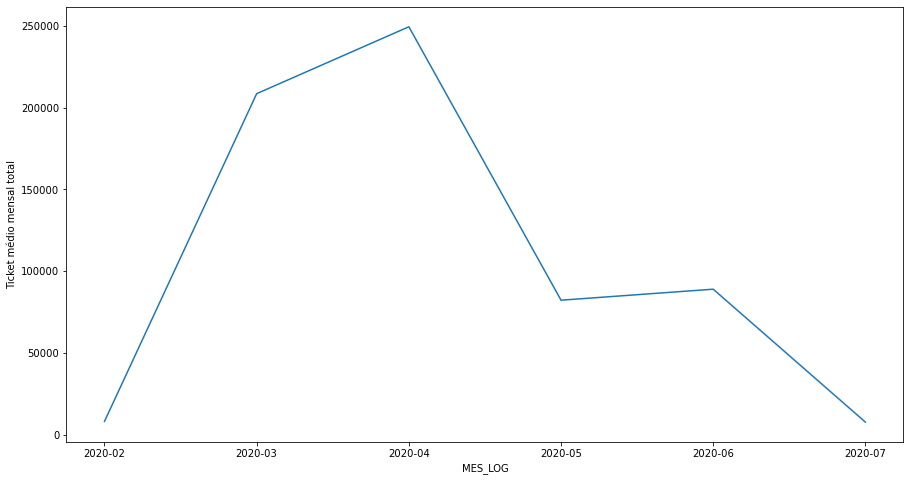

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=df_base_calouros_with_curso_evadidos_cursando_ticket_total, x="MES_LOG", y="Ticket médio mensal total")

## Avaliando a evasão mensal

In [ ]:
df_evasao_mensal = df_base_calouros_with_curso_evadidos_cursando.groupby(['MES_LOG'],as_index=False)['CODIGO_ALUNO'].nunique().rename(columns={'CODIGO_ALUNO':'EVASAO_MENSAL'})
df_evasao_mensal

,MES_LOG,EVASAO_MENSAL
0,2020-02,40
1,2020-03,920
2,2020-04,1068
3,2020-05,417
4,2020-06,341
5,2020-07,34


## Gráfico das evações mensais

É possivel observar que os grafico de ticket e evasão são praticamente iguais.

<AxesSubplot:xlabel='MES_LOG', ylabel='EVASAO_MENSAL'>

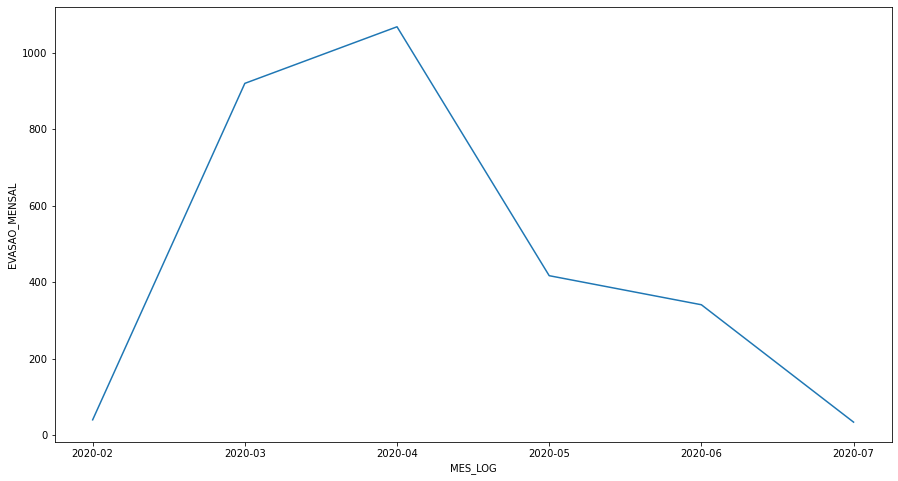

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=df_evasao_mensal, x="MES_LOG", y="EVASAO_MENSAL")

## Avaliando a curva de casos de Covid-19

In [ ]:
# Filtrando Brasil
df_covid_cut_brasil = df_covid[df_covid['regiao']=='Brasil']
# Extraindo mês/ano
df_covid_cut_brasil['mes_ano'] = pd.to_datetime(df_covid_cut_brasil['data']).dt.to_period('M').astype(str)
# Agrupando casos por mês/ano
df_covid_cut_brasil_total_mensal = df_covid_cut_brasil.groupby(['mes_ano'],as_index=False)['casosNovos'].sum().rename(columns={'casosNovos':'casos_mensais'})
df_covid_cut_brasil_total_mensal

,mes_ano,casos_mensais
0,2020-02,2
1,2020-03,5715
2,2020-04,79663
3,2020-05,428820
4,2020-06,887841
5,2020-07,1260444
6,2020-08,1245787
7,2020-09,902663
8,2020-10,724670
9,2020-11,800273


## Curva de casos

<AxesSubplot:xlabel='mes_ano', ylabel='casos_mensais'>

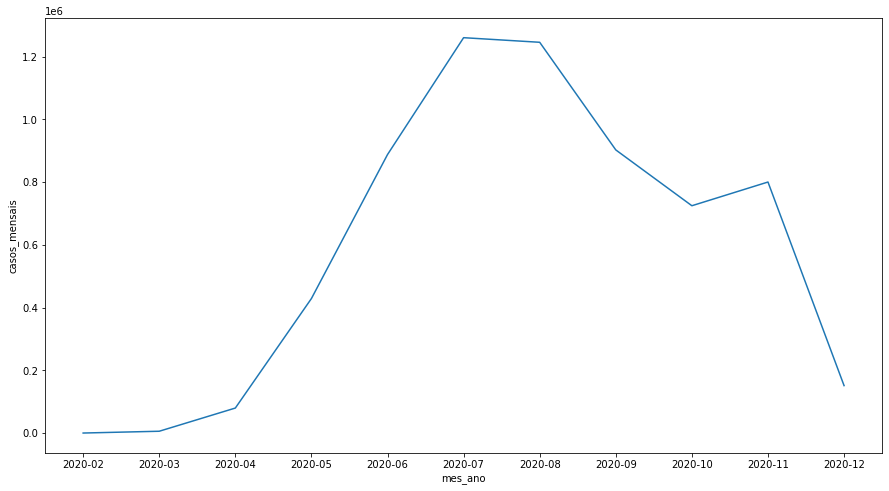

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=df_covid_cut_brasil_total_mensal, x="mes_ano", y="casos_mensais")

## Função para Normalização


In [ ]:
def df_norm(df):   
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df)
    df_normalized = pd.DataFrame(np_scaled, columns = df.columns)    
    return df_normalized

# Visualização Evasão vs Casos de Covid-19

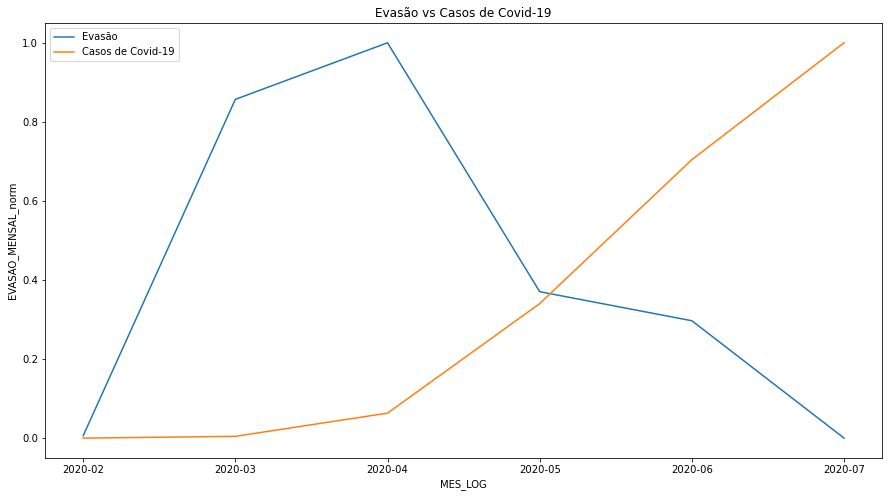

In [ ]:
# Filtrando dados
df_evasao_mensal['EVASAO_MENSAL_norm'] = df_norm(df_evasao_mensal[['EVASAO_MENSAL']])
df_covid_cut_brasil_total_mensal['casos_mensais_norm'] = df_norm(df_covid_cut_brasil_total_mensal[['casos_mensais']])
df_covid_cut_brasil_total_mensal = df_covid_cut_brasil_total_mensal[df_covid_cut_brasil_total_mensal['mes_ano'] <= df_evasao_mensal['MES_LOG'].max()]

#Plot dados
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=df_evasao_mensal, x="MES_LOG", y="EVASAO_MENSAL_norm")
sns.lineplot(data=df_covid_cut_brasil_total_mensal, x="mes_ano", y="casos_mensais_norm")
ax.legend(['Evasão','Casos de Covid-19'])
plt.title('Evasão vs Casos de Covid-19')
plt.show()

In [ ]:
df_evasao_covid

,mes_ano,MES_LOG,EVASAO_MENSAL,EVASAO_MENSAL_norm,type_x,casos_mensais,casos_mensais_norm,type_y
0,2020-02,2020-02,40,0.005803,Evasao,2,0.000000,Covid-19
1,2020-03,2020-03,920,0.856867,Evasao,5715,0.004533,Covid-19
2,2020-04,2020-04,1068,1.000000,Evasao,79663,0.063201,Covid-19
3,2020-05,2020-05,417,0.370406,Evasao,428820,0.340212,Covid-19
4,2020-06,2020-06,341,0.296905,Evasao,887841,0.704387,Covid-19
5,2020-07,2020-07,34,0.000000,Evasao,1260444,1.000000,Covid-19


### Correlção dos dados

Há uma correlação razoável de 55%, mas acredito que esteja relacionada a perca de renda através da pandêmia do que diretamente pelo número de casos.

In [ ]:
df_evasao_covid = pd.DataFrame(df_evasao_mensal['MES_LOG'].append(df_covid_cut_brasil_total_mensal['mes_ano']).drop_duplicates().reset_index(drop=True), columns=['mes_ano'])
df_evasao_covid = pd.merge(df_evasao_covid, df_evasao_mensal, left_on='mes_ano', right_on='MES_LOG',
                 how='left').merge(df_covid_cut_brasil_total_mensal, left_on='mes_ano', right_on='mes_ano',
                 how='left')
df_evasao_covid.corr()

,EVASAO_MENSAL,EVASAO_MENSAL_norm,casos_mensais,casos_mensais_norm
EVASAO_MENSAL,1.000000,1.000000,-0.553507,-0.553507
EVASAO_MENSAL_norm,1.000000,1.000000,-0.553507,-0.553507
casos_mensais,-0.553507,-0.553507,1.000000,1.000000
casos_mensais_norm,-0.553507,-0.553507,1.000000,1.000000
